In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# import titanic data
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
# seprate out survide and not survice records
titanic_survived = titanic_df[['Pclass', 'Sex', 'Age', 'Fare']][titanic_df.Survived == 1]
titanic_not_survived = titanic_df[['Pclass', 'Sex', 'Age', 'Fare']][titanic_df.Survived == 0]

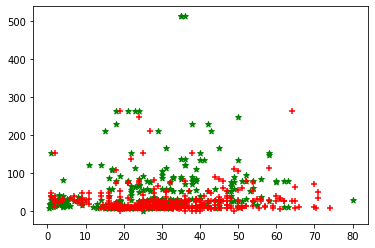

In [63]:
plt.scatter(titanic_survived['Age'], titanic_survived['Fare'], color = 'green', marker = '*')
plt.scatter(titanic_not_survived['Age'], titanic_not_survived['Fare'], color = 'red', marker = '+')

In [11]:
# prepare data
# independedt variable [Pclass, sex, age, Fare]
titanic_ind = titanic_df[['Pclass', 'Sex', 'Age', 'Fare']]
titanic_ind

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,NaN,23.4500
889,1,1,26.0,30.0000


D:\Softwares\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Softwares\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


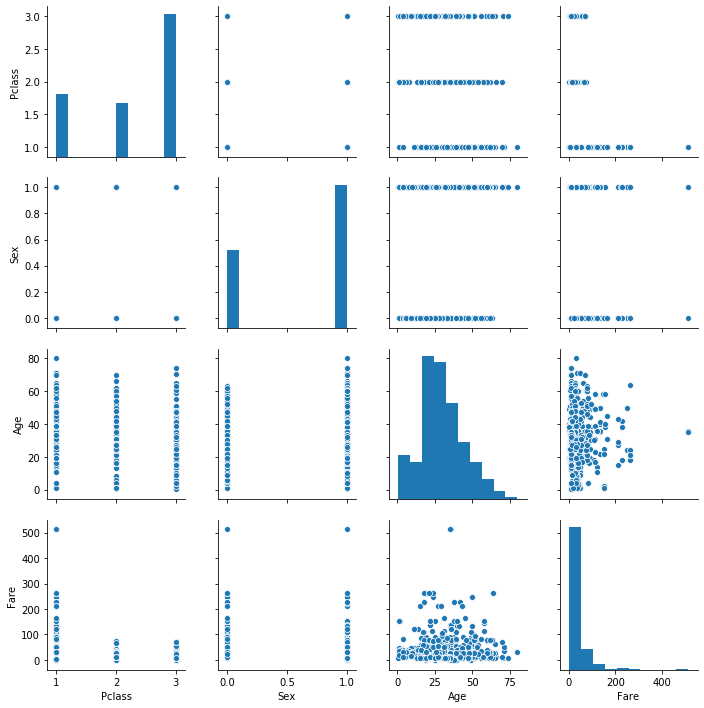

In [46]:
sb.pairplot(titanic_ind)

In [29]:
titanic_ind.isnull().sum(axis = 0)

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [33]:
# fill the Age NAN values with average age
titanic_complete = titanic_ind.fillna(titanic_ind.mean())

In [34]:
titanic_complete.isnull().sum(axis = 0)

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [35]:
# Label encode Sex column
le = LabelEncoder()
X = titanic_complete
X.Sex = le.fit_transform(X.Sex)
X.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [36]:
y = titanic_df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [50]:
# split the data fro train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
X_train

,Pclass,Sex,Age,Fare
532,3,1,17.000000,7.2292
168,1,1,29.699118,25.9250
120,2,1,21.000000,73.5000
837,3,1,29.699118,8.0500
329,1,0,16.000000,57.9792
...,...,...,...,...
659,1,1,58.000000,113.2750
181,2,1,29.699118,15.0500
354,3,1,29.699118,7.2250
518,2,0,36.000000,26.0000


In [39]:
# instantiate the model
model = tree.DecisionTreeClassifier()

In [40]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
y_predict = model.predict(X_test)

In [44]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.7541899441340782


In [49]:
# optimizing the model with tuning in hyperparameter [criterion = 'entropy', max_depth = 3]
op_model = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

In [51]:
op_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
y_predict = op_model.predict(X_test)

In [53]:
print('Optimized Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Optimized Accuracy:  0.7932960893854749
